In [130]:
import pandas as pd
import numpy as np
from benford import Benford
import matplotlib.pyplot as plt


### Import the population Dataset, analyze with Benford and Plot

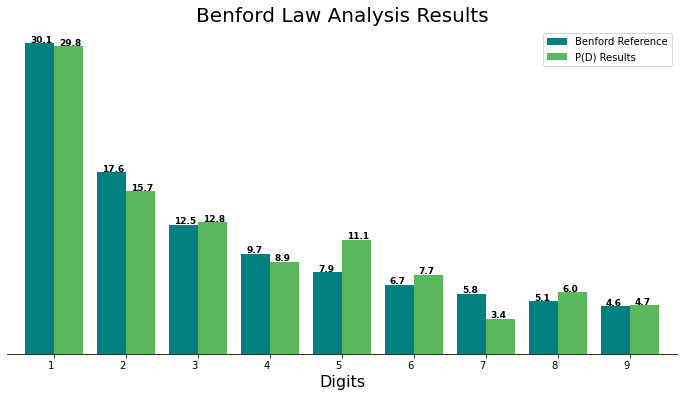

In [136]:

ben_normal = Benford()
path = 'population.csv'
ben_normal.load_dataset(path)
ben_normal.benford_analysis()
ben_normal.plot()

In [144]:
ben_normal.dataset.sum() == 7794798739

True

In [156]:
np.array_equal(ben_normal.digits , np.array([1,2,3,4,5,6,7,8,9]))

True

In [143]:
b = Benford()
b.dataset == None

True

In [146]:
r = ben_normal.digits_count
r

array([29.78723404, 15.74468085, 12.76595745,  8.93617021, 11.06382979,
        7.65957447,  3.40425532,  5.95744681,  4.68085106])

In [148]:
n = np.round(r, decimals=2) 
n

array([29.79, 15.74, 12.77,  8.94, 11.06,  7.66,  3.4 ,  5.96,  4.68])

In [149]:
n[0]

29.79

In [117]:
dataset = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',index_col=0)

In [118]:
columna = dataset.columns
    
dataset.set_index(columna[0], inplace=True)  # Para regenerar el indice por pais
dataset.drop(['Lat', 'Long'], axis=1, inplace=True)

In [119]:
def get_daily_values(dataset):
    '''
    From the accumulated Dataset this function calculate the daily values
      
    Args:
       
        dataset : dataset with the accumulated cases
       
    Returns:
         daily_dataset: data frame with the daily values
    '''
    columns = dataset.columns
    daily_value = np.empty(len(dataset)) # create a temporary numpy array to store the daily values 
    daily_dataset = pd.DataFrame(index=dataset.index)
    for country in columns: 
        country_data = dataset[country] 
        for i in range(len(country_data)-1): 
            daily_value[-i-1] = country_data[-i-1] - country_data[-i-2] 
            daily_value[0] = country_data[0] 
        daily_dataset[country] = daily_value
    
    return daily_dataset

In [120]:
def columns_dataset_to_timestamp(dataset):
    '''
    From the Dataset this function take the columns in string format and conver to timestamp 
    
      
    Args:
        dataset : pandas datarframe dataset with string date format columns
       
    Returns:
         datset: with columns in timestamp format
    '''

    columns = list(dataset.columns)
    dataset.columns = pd.to_datetime(columns)

    return dataset

In [121]:
subdata = dataset.groupby('Country/Region', axis=0).sum()        #Sum the daily data by country
subdata =  columns_dataset_to_timestamp(subdata) #Change the columns format date to timestamp
dataset = get_daily_values(subdata.T)

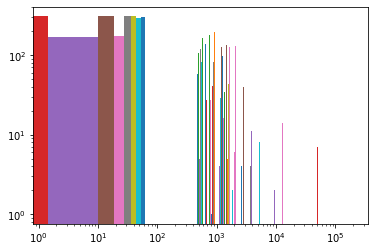

In [134]:
data = dataset
data = np.asarray(data)
plt.hist(data, bins=100, log=True)
plt.xscale('log')

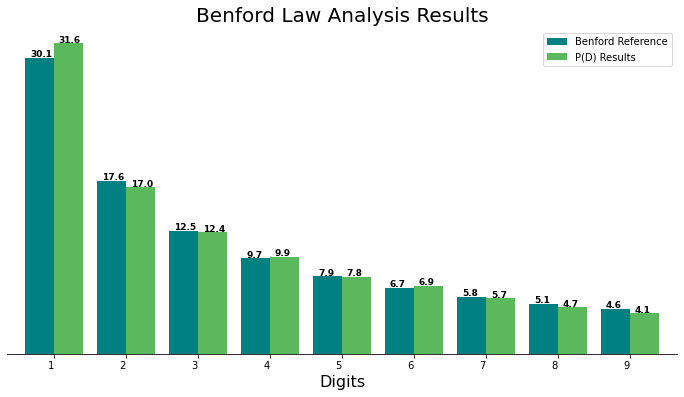

In [126]:
data = np.asarray(data)
ben_covid = Benford(dataset=data)
ben_covid.benford_analysis()
ben_covid.plot()

In [151]:
image = Benford()
image.load_image('./tests/flower.jpg')
image.benford_analysis()

Image read


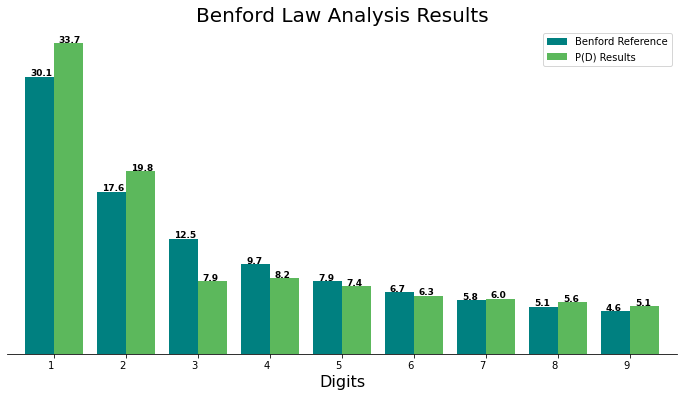

In [152]:
image.plot()

In [154]:
image.digits_count.sum() == 100

True